# IRIS FlOWER CLASSIFICATION 

### Step 1: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pickle

### Step 2: Load and Explore the Dataset

In [3]:
df= pd.read_csv('iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df= df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print(df.shape)


(150, 5)


### * Descriptive Statistics of Data

In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


### Check Missing Value

In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
print("Missing values in each column:")
print(df.isnull().sum())  #Check for missing values (null/na)

Missing values in each column:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Step 3 :Exploratory Data Analysis (EDA)

- In EDA, we often drop the Species column when performing operations like correlation or certain visualizations because it is a **categorical variable.**
- Many EDA techniques, such as histograms, pairplots, or correlation matrices, are designed to work with numeric data. Including a categorical column like Species could cause errors or skew results. 


In [11]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


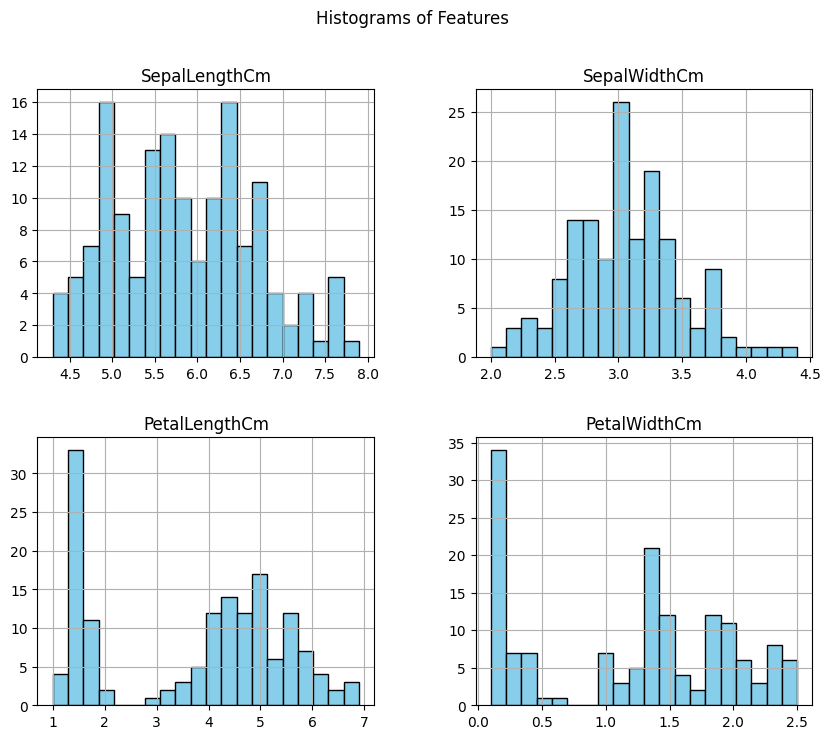

In [12]:
# Histogram for each feature
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

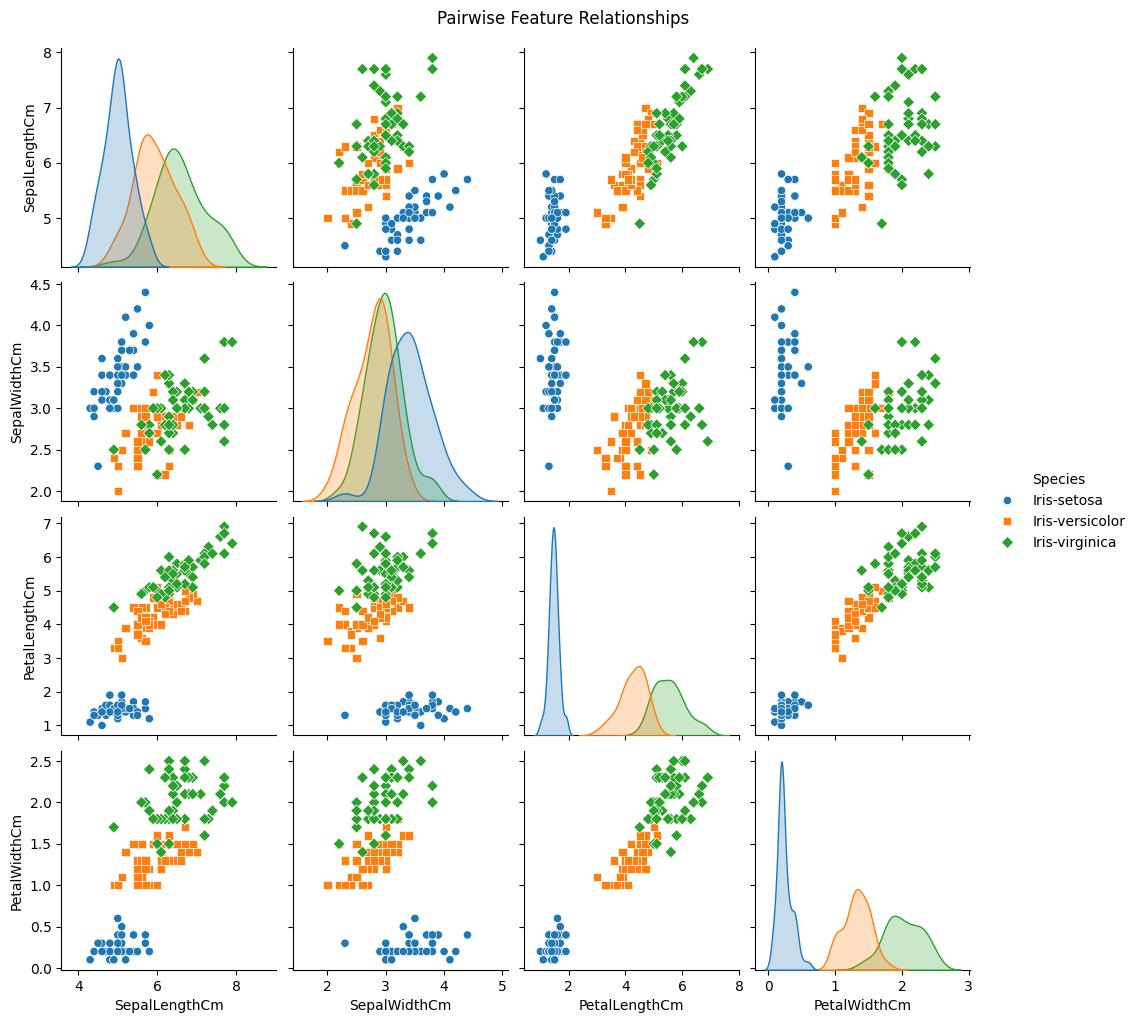

In [13]:
# Pairplot to show pairwise relationships between features
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

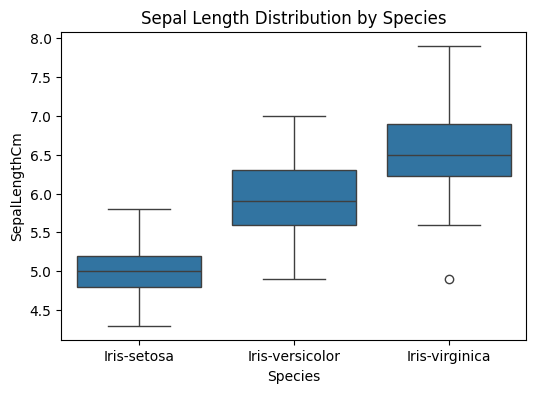

In [14]:

# Boxplot for Sepal Length by Species
plt.figure(figsize=(6, 4))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length Distribution by Species')
plt.show()


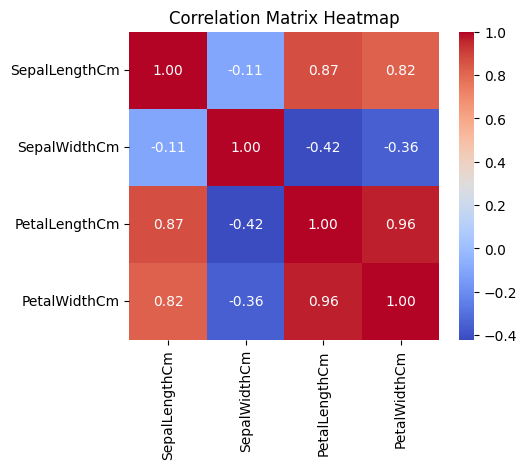

In [15]:
# Dropping the 'Species' column for correlation calculation
correlation_matrix = df.drop('Species', axis=1).corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(5,4))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Step 4: Data Spliting
The dataset is split into training and testing sets, where 80% of the data is used for training (X_train, y_train) and 20% for testing (X_test, y_test). The test_size=0.2 parameter controls this split, while random_state=42 ensures reproducibility by keeping the data split consistent across runs.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

X = df.drop('Species',axis=1) #Features(independent variables) Input data 
Y = df['Species']   #target Variable(dependent variables)  Output data

# split the data for train and test
X_train, X_test, Y_train, Y_test = train_test_split( X,Y,test_size=0.2, random_state=40)

### Step 5 : Standardization using StandardScaler

Standardization scales data to have a mean of 0 and a standard deviation of 1, ensuring equal feature contribution. Using **StandardScaler**, we fit it on the training data and transform both training and test data, avoiding data leakage. This improves performance for algorithms like K-Nearest Neighbors, Logistic Regression, and Support Vector Machines.

In [17]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

### Step 6 : Model Training and evaluation

In [18]:
# Random Forest

# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, rf_pred) * 100
print(f"Random Forest Accuracy: {accuracy:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_pred))
print("Classification Report:\n", classification_report(Y_test, rf_pred))



Random Forest Accuracy: 100.00%
Confusion Matrix:
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train the model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, Y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, lr_pred) * 100
print(f"Logistic Regression Accuracy: {accuracy:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, lr_pred))
print("Classification Report:\n", classification_report(Y_test, lr_pred))


Logistic Regression Accuracy: 100.00%
Confusion Matrix:
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Predict
dt_pred = dt_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, dt_pred) * 100
print(f"Decision Tree Accuracy: {accuracy:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, dt_pred))
print("Classification Report:\n", classification_report(Y_test, dt_pred))


Decision Tree Accuracy: 100.00%
Confusion Matrix:
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### Step 7 : Cross Validation to check best model

In [21]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_rf = cross_val_score(rf_model, X, Y, cv=5) # 5-fold cross-validation
cv_lr = cross_val_score(lr_model, X, Y, cv=5)
cv_dt = cross_val_score(dt_model, X, Y, cv=5)

print(f"Random Forest CV Accuracy: {cv_rf.mean() * 100:.2f}%")
print(f"Logistic Regression CV Accuracy: {cv_lr.mean() * 100:.2f}%")
print(f"Decision Tree CV Accuracy: {cv_dt.mean() * 100:.2f}%")


Random Forest CV Accuracy: 96.67%
Logistic Regression CV Accuracy: 97.33%
Decision Tree CV Accuracy: 96.67%


### Step 8: Saved in Pickle 

In [22]:
import pickle
with open('logistic_reg.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

print("Logistic Regression model saved as 'logistic_reg.pkl'")


Logistic Regression model saved as 'logistic_reg.pkl'


In [23]:
# Load the saved model from the pickle file
with open('logistic_reg.pkl', 'rb') as file:
    loaded_lr_model = pickle.load(file)


## Conclusion: 
In this project, we evaluated multiple machine learning models—Random Forest, Logistic Regression, and Decision Tree—using cross-validation, with Logistic Regression achieving the highest accuracy of 97.33%. Based on these results, Logistic Regression was selected as the best-performing model. Finally, the trained model was saved using **pickle** for easy deployment and future predictions without the need for retraining.